# Travel Package Purchase Prediction

## Background

Visit With Us is looking to grow and acquire new customers.  They are going to be offering a new package, Wellness Tourism Package.  This package allows the travelor to maintain or kickstart a healthy lifestyle, and increase well-being.  They have hired me to analyze the packages.

## Key Question to Answer

Which customer is going to purchase the travel packages?

## Dataset
#### The lines below give a brief definition of each variable in the dataset:

CustomerID: Unique customer ID

ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)

Age: Age of customer

TypeofContact: How customer was contacted (Company Invited or Self Inquiry)

CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3

DurationOfPitch: Duration of the pitch by a salesperson to the customer

Occupation: Occupation of customer

Gender: Gender of customer

NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer

PreferredPropertyStar: Preferred hotel property rating by customer

MaritalStatus: Marital status of customer

NumberOfTrips: Average number of trips in a year by customer

Passport: The customer has a passport or not (0: No, 1: Yes)

OwnCar: Whether the customers own a car or not (0: No, 1: Yes)

NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer

Designation: Designation of the customer in the current organization

MonthlyIncome: Gross monthly income of the customer

In [1]:
# To help make our code look less cluttered, this removes the warnings that pop up.
import warnings

warnings.filterwarnings("ignore")

In [2]:
# Importing the packages for this project

%load_ext nb_black

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

%matplotlib inline


# Splitting data in train and test splits
from sklearn.model_selection import train_test_split

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune
from sklearn.model_selection import GridSearchCV

# To get diferent metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

# Bagging and Boosting
from sklearn import metrics
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    BaggingRegressor,
    RandomForestRegressor,
    GradientBoostingRegressor,
    AdaBoostRegressor,
    StackingRegressor,
)
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

<IPython.core.display.Javascript object>

In [3]:
# Reading our dataset titled "Tourism.xlsx".
file = pd.read_excel("Tourism.xlsx", sheet_name="Tourism")

# Making a copy of the dataset, so I am not making any changes to the original file.
data = file.copy()

<IPython.core.display.Javascript object>

In [4]:
# Viewing the first 5 rows of the dataset
data.head(20)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
5,200005,0,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Single,1.0,0,5,1,1.0,Executive,18068.0
6,200006,0,59.0,Self Enquiry,1,9.0,Small Business,Female,2,2.0,Basic,5.0,Divorced,5.0,1,2,1,1.0,Executive,17670.0
7,200007,0,30.0,Self Enquiry,1,30.0,Salaried,Male,3,3.0,Basic,3.0,Married,2.0,0,2,0,1.0,Executive,17693.0
8,200008,0,38.0,Company Invited,1,29.0,Salaried,Male,2,4.0,Standard,3.0,Unmarried,1.0,0,3,0,0.0,Senior Manager,24526.0
9,200009,0,36.0,Self Enquiry,1,33.0,Small Business,Male,3,3.0,Deluxe,3.0,Divorced,7.0,0,3,1,0.0,Manager,20237.0


<IPython.core.display.Javascript object>

#### Observations
There appears to be an issue with the Gender variable.  I see some showing up as "Fe Male" with a space. I need to remedy this.

In [5]:
# Viewing the last 5 rows of the dataset
data.tail(20)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4868,204868,1,43.0,Company Invited,2,15.0,Salaried,Female,4,5.0,Basic,3.0,Married,NaN,0,5,1,2.0,Executive,36539.0
4869,204869,1,56.0,Self Enquiry,3,16.0,Small Business,Female,3,6.0,Basic,4.0,Single,NaN,0,1,1,2.0,Executive,37865.0
4870,204870,1,57.0,Self Enquiry,3,23.0,Salaried,Female,4,4.0,Standard,NaN,Single,4.0,1,5,1,3.0,Senior Manager,38395.0
4871,204871,1,41.0,Self Enquiry,3,23.0,Small Business,Male,4,4.0,Standard,3.0,Married,4.0,0,5,0,2.0,Senior Manager,22222.0
4872,204872,1,35.0,Company Invited,1,24.0,Large Business,Male,3,5.0,Basic,3.0,Married,2.0,1,5,1,2.0,Executive,27178.0
4873,204873,1,41.0,Self Enquiry,3,14.0,Small Business,Male,3,4.0,Basic,4.0,Unmarried,3.0,0,5,0,1.0,Executive,23339.0
4874,204874,1,42.0,Self Enquiry,1,15.0,Small Business,Female,4,4.0,Basic,5.0,Married,3.0,1,3,0,3.0,Executive,22781.0
4875,204875,1,36.0,Company Invited,1,8.0,Small Business,Male,4,4.0,Basic,4.0,Married,3.0,1,3,1,1.0,Executive,22927.0
4876,204876,1,52.0,Self Enquiry,3,34.0,Salaried,Male,3,4.0,Deluxe,3.0,Single,3.0,1,5,1,2.0,Manager,32704.0
4877,204877,1,39.0,Company Invited,1,16.0,Salaried,Male,4,4.0,Deluxe,5.0,Married,6.0,0,3,0,3.0,Manager,25571.0


<IPython.core.display.Javascript object>

In [6]:
# Looking at the shape of the dataset
data.shape

(4888, 20)

<IPython.core.display.Javascript object>

#### Observations
There are 4888 rows and 20 columns in the dataset.

In [7]:
# Looking at the data types of our variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

<IPython.core.display.Javascript object>

In [8]:
# Let's drop the CustomerID column, as it is just an index column
data.drop(["CustomerID"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [9]:
# Checking that CustomerID is removed
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ProdTaken                 4888 non-null   int64  
 1   Age                       4662 non-null   float64
 2   TypeofContact             4863 non-null   object 
 3   CityTier                  4888 non-null   int64  
 4   DurationOfPitch           4637 non-null   float64
 5   Occupation                4888 non-null   object 
 6   Gender                    4888 non-null   object 
 7   NumberOfPersonVisiting    4888 non-null   int64  
 8   NumberOfFollowups         4843 non-null   float64
 9   ProductPitched            4888 non-null   object 
 10  PreferredPropertyStar     4862 non-null   float64
 11  MaritalStatus             4888 non-null   object 
 12  NumberOfTrips             4748 non-null   float64
 13  Passport                  4888 non-null   int64  
 14  PitchSat

<IPython.core.display.Javascript object>

#### Observations
CustomerID is now removed from the dataset

In [10]:
# Let's get an understanding on missing values in our dataset
data.isnull().sum().sort_values(ascending=False)

DurationOfPitch             251
MonthlyIncome               233
Age                         226
NumberOfTrips               140
NumberOfChildrenVisiting     66
NumberOfFollowups            45
PreferredPropertyStar        26
TypeofContact                25
Gender                        0
CityTier                      0
Occupation                    0
ProductPitched                0
NumberOfPersonVisiting        0
Designation                   0
MaritalStatus                 0
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
ProdTaken                     0
dtype: int64

<IPython.core.display.Javascript object>

In [11]:
# Cleaning the data. Looking for any blank entries in the dataset
data = data.dropna()

<IPython.core.display.Javascript object>

In [12]:
# Looking at the shape of the dataset
data.shape

(4128, 19)

<IPython.core.display.Javascript object>

#### Observations
I removed the blanks from the dataset.

In [13]:
# Let's check the options for Genders, I noticed some issues when looking at the dateset.
data["Gender"].unique()

array(['Female', 'Male', 'Fe Male'], dtype=object)

<IPython.core.display.Javascript object>

#### Observations
It appears that some entries are errors, and are listed as "Fe Male". Let's clean this, and convert to Female.

In [14]:
# Let's convert "Fe Male" to "Female"
data["Gender"] = data["Gender"].replace(["Fe Male"], "Female")

<IPython.core.display.Javascript object>

In [15]:
# Let's now convert some datatypes
data["ProdTaken"] = data["ProdTaken"].astype("bool")
data["Age"] = data["Age"].astype("int64")
data["TypeofContact"] = data["TypeofContact"].astype("category")
data["CityTier"] = data["CityTier"].astype("category")
data["Occupation"] = data["Occupation"].astype("category")
data["Gender"] = data["Gender"].astype("category")
data["ProductPitched"] = data["ProductPitched"].astype("category")
data["PreferredPropertyStar"] = data["PreferredPropertyStar"].astype("category")
data["MaritalStatus"] = data["MaritalStatus"].astype("category")
data["MaritalStatus"] = data["MaritalStatus"].astype("category")
data["Passport"] = data["Passport"].astype("bool")
data["PitchSatisfactionScore"] = data["PitchSatisfactionScore"].astype("category")
data["OwnCar"] = data["OwnCar"].astype("bool")
data["Designation"] = data["Designation"].astype("category")

<IPython.core.display.Javascript object>

In [16]:
# Looking at the data types of our variables
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4128 non-null   bool    
 1   Age                       4128 non-null   int64   
 2   TypeofContact             4128 non-null   category
 3   CityTier                  4128 non-null   category
 4   DurationOfPitch           4128 non-null   float64 
 5   Occupation                4128 non-null   category
 6   Gender                    4128 non-null   category
 7   NumberOfPersonVisiting    4128 non-null   int64   
 8   NumberOfFollowups         4128 non-null   float64 
 9   ProductPitched            4128 non-null   category
 10  PreferredPropertyStar     4128 non-null   category
 11  MaritalStatus             4128 non-null   category
 12  NumberOfTrips             4128 non-null   float64 
 13  Passport                  4128 non-null   bool  

<IPython.core.display.Javascript object>

#### Observations
Our datatypes are now in order

In [17]:
# Giving us some basic numbers in regards to our dataset. ".T" is to transpose the data.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4128.0,37.231831,9.174521,18.0,31.0,36.0,43.0,61.0
DurationOfPitch,4128.0,15.584787,8.398142,5.0,9.0,14.0,20.0,127.0
NumberOfPersonVisiting,4128.0,2.949370,0.718818,1.0,2.0,3.0,3.0,5.0
NumberOfFollowups,4128.0,3.741521,1.006786,1.0,3.0,4.0,4.0,6.0
NumberOfTrips,4128.0,3.295300,1.856300,1.0,2.0,3.0,4.0,22.0
NumberOfChildrenVisiting,4128.0,1.223595,0.852685,0.0,1.0,1.0,2.0,3.0
MonthlyIncome,4128.0,23178.464147,4506.614622,1000.0,20751.0,22418.0,25301.0,98678.0


<IPython.core.display.Javascript object>

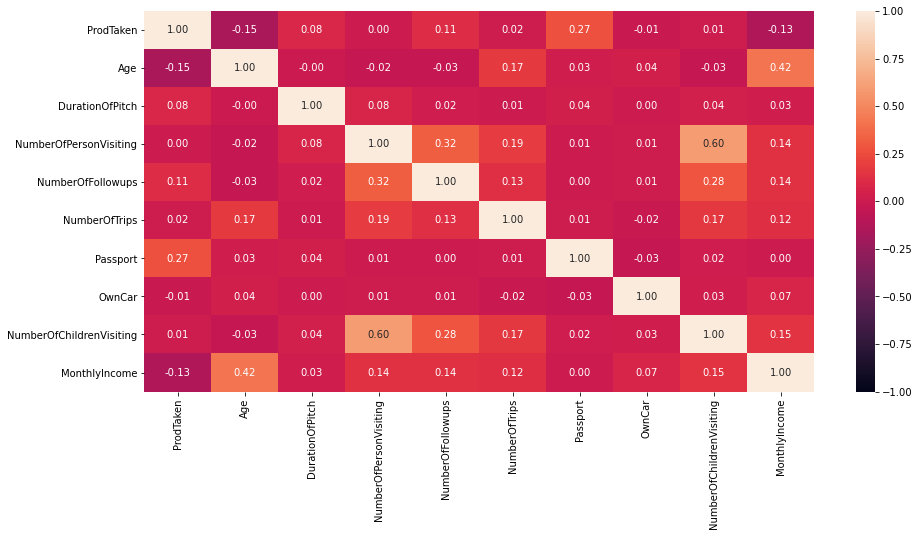

<IPython.core.display.Javascript object>

In [18]:
# Heatmap of variable correlation
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f")
plt.show()

#### Observations
I do not see any direct standouts in our correlation. Income and Age appears to be the most obvious. I will look at the variables further.

## EDA

In [19]:
# Defining a function to show percentage on bars for our countplots
def percent(plot, feature):
    """
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    """
    total = len(feature)
    for p in ax.patches:
        percentage = "{:.1f}%".format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size=12)
    plt.show()


# Defining a histogram function to show us outliers and boxplot, as well as median and mean vlines
def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color="violet")
    sns.distplot(
        feature, kde=F, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.distplot(feature, kde=False, ax=ax_hist2)
    ax_hist2.axvline(np.mean(feature), color="green", linestyle="--")
    ax_hist2.axvline(np.median(feature), color="black", linestyle="-")

<IPython.core.display.Javascript object>

### Univariate Analysis

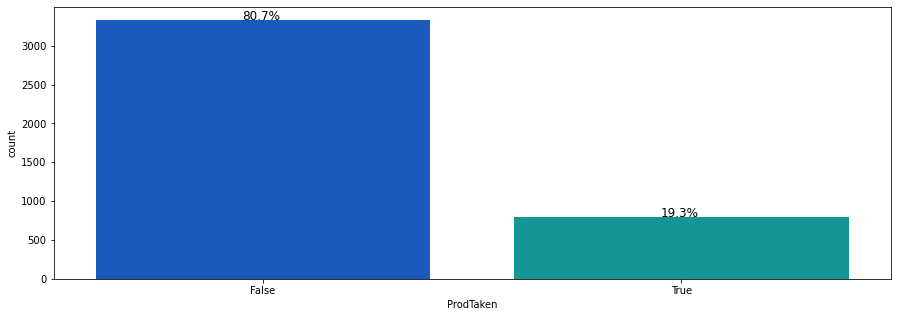

<IPython.core.display.Javascript object>

In [20]:
# Countplot of ProdTaken
plt.figure(figsize=(15, 5))
ax = sns.countplot(data["ProdTaken"], palette="winter")
percent(ax, data["ProdTaken"])

#### Observations
I see roughly a 20% average conversion rate in the dataset.

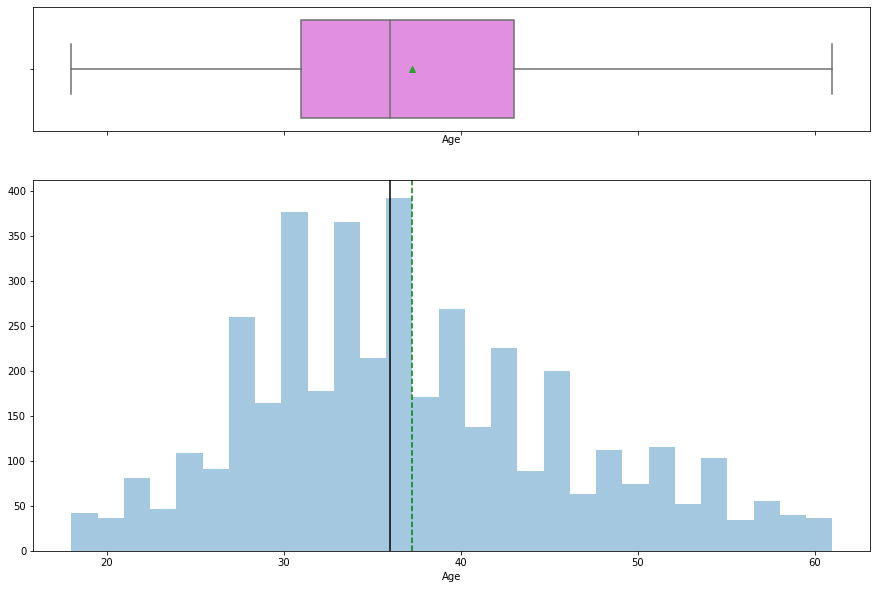

<IPython.core.display.Javascript object>

In [21]:
# Histogram showing Age
histogram_boxplot(data["Age"])

#### Observations
There is a right skew with our mean being higher than the median.

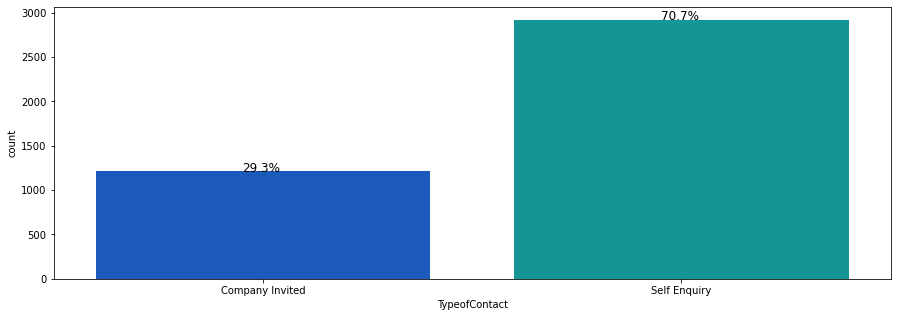

<IPython.core.display.Javascript object>

In [22]:
# Countplot of TypeofContact
plt.figure(figsize=(15, 5))
ax = sns.countplot(data["TypeofContact"], palette="winter")
percent(ax, data["TypeofContact"])

#### Observations
I see that 70% of the dataset is Self Inquiry for TypeOfContact

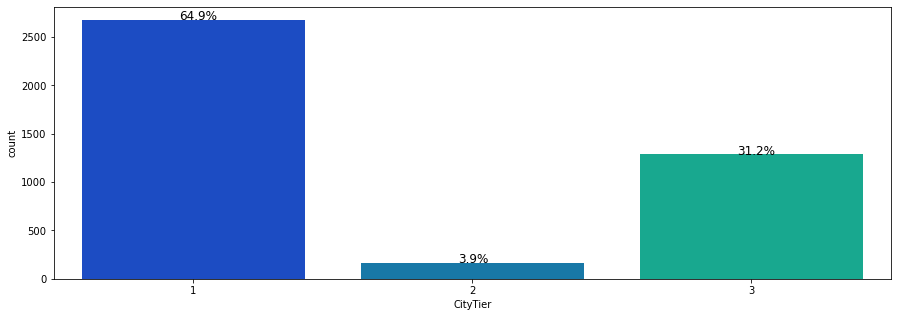

<IPython.core.display.Javascript object>

In [23]:
# Countplot of CityTier
plt.figure(figsize=(15, 5))
ax = sns.countplot(data["CityTier"], palette="winter")
percent(ax, data["CityTier"])

#### Observations
CityTier 2 is quite rare, occupying 3.9% of the dataset. CityTier 1 is the majority, taking up about two-thirds of the dataset.

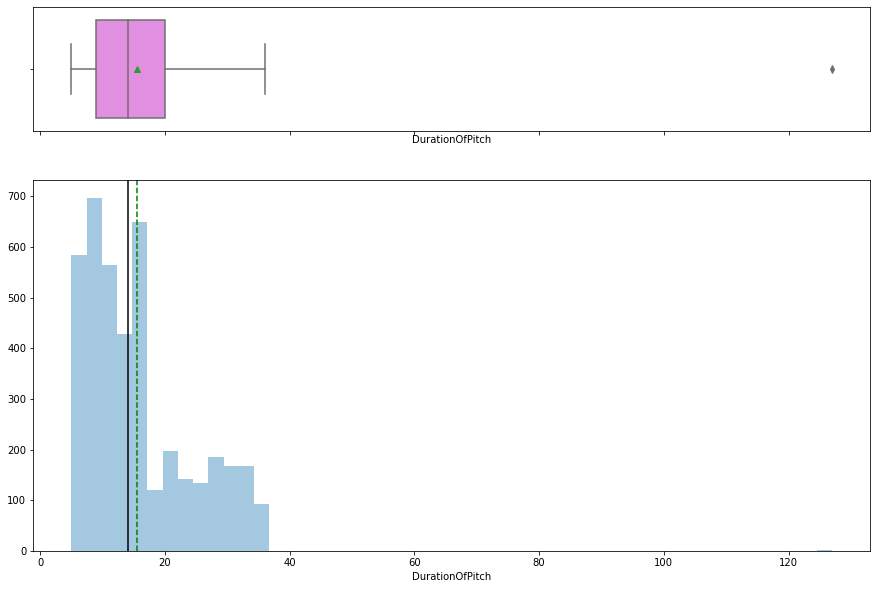

<IPython.core.display.Javascript object>

In [24]:
# Histogram showing DurationOfPitch
histogram_boxplot(data["DurationOfPitch"])

#### Observations
There is an outlier here that will be remedied later.  The mean is greater than the median, indicating a right skew in the data.

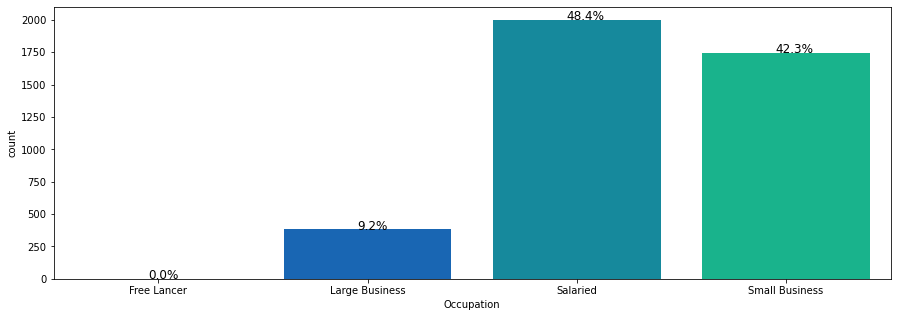

<IPython.core.display.Javascript object>

In [25]:
# Countplot of Occupation
plt.figure(figsize=(15, 5))
ax = sns.countplot(data["Occupation"], palette="winter")
percent(ax, data["Occupation"])

#### Observations
Salaried and Small Business take up a large majority of the dataset.

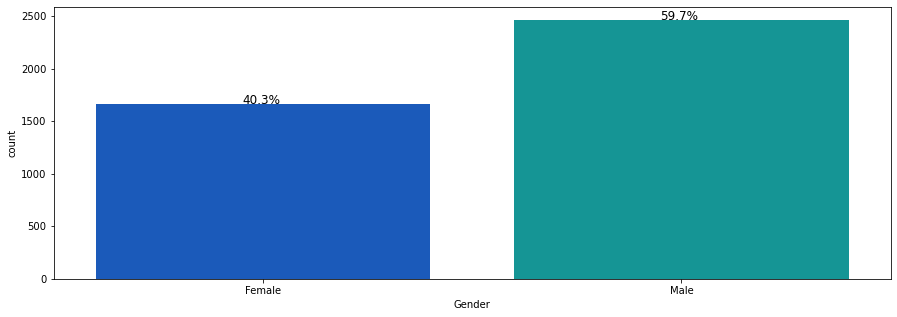

<IPython.core.display.Javascript object>

In [26]:
# Countplot of Gender
plt.figure(figsize=(15, 5))
ax = sns.countplot(data["Gender"], palette="winter")
percent(ax, data["Gender"])

#### Observations
There is slightly more males in the dataset. I will determine if Gender plays a factor in conversion.

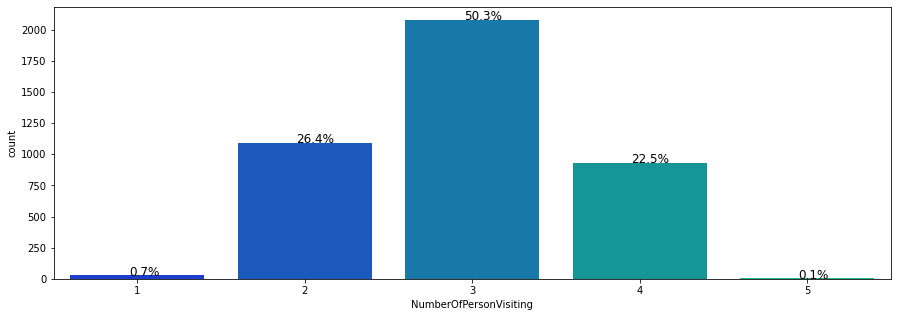

<IPython.core.display.Javascript object>

In [27]:
# Countplot of NumberOfPersonVisiting
plt.figure(figsize=(15, 5))
ax = sns.countplot(data["NumberOfPersonVisiting"], palette="winter")
percent(ax, data["NumberOfPersonVisiting"])

#### Observations
NumberOfPersonVisiting mainly ranges from 2-4.  These three categories take up 99% of the dataset.

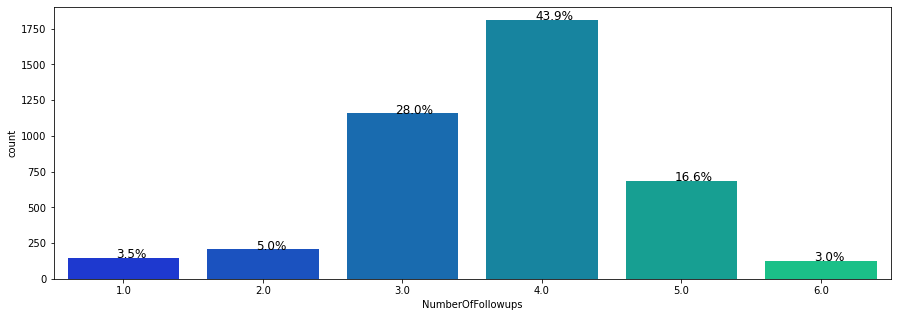

<IPython.core.display.Javascript object>

In [28]:
# Countplot of NumberOfFollowups
plt.figure(figsize=(15, 5))
ax = sns.countplot(data["NumberOfFollowups"], palette="winter")
percent(ax, data["NumberOfFollowups"])

#### Observations
Most of the dataset is between 3 to 5 followups.  

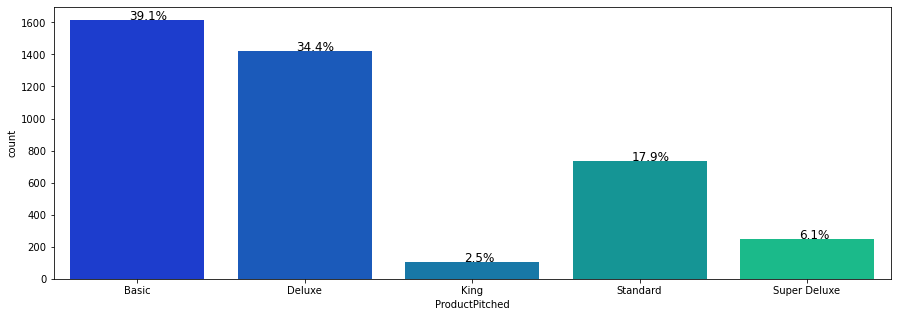

<IPython.core.display.Javascript object>

In [29]:
# Countplot of ProductPitched
plt.figure(figsize=(15, 5))
ax = sns.countplot(data["ProductPitched"], palette="winter")
percent(ax, data["ProductPitched"])

#### Observations
Basic and deluxe are by far the most pitched between the 5 products.

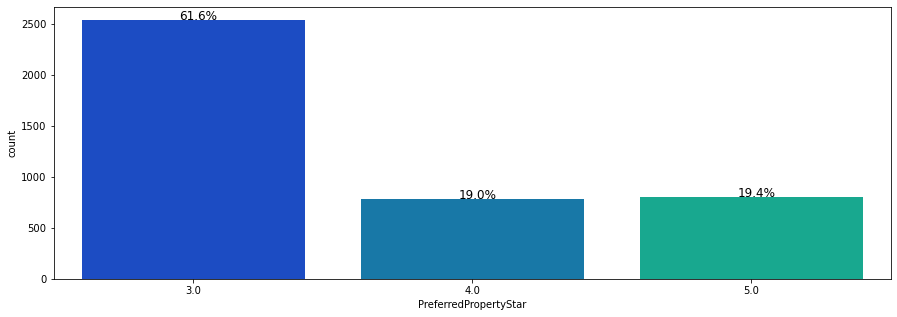

<IPython.core.display.Javascript object>

In [30]:
# Countplot of PreferredPropertyStar
plt.figure(figsize=(15, 5))
ax = sns.countplot(data["PreferredPropertyStar"], palette="winter")
percent(ax, data["PreferredPropertyStar"])

#### Observations
3 is the most common, occupying three-fifths of the data.

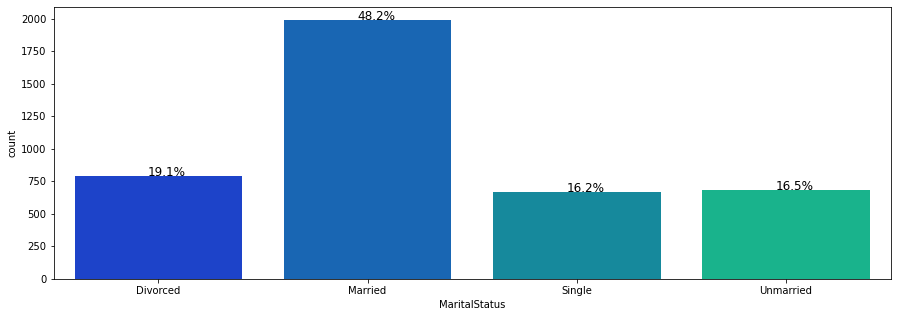

<IPython.core.display.Javascript object>

In [31]:
# Countplot of MaritalStatus
plt.figure(figsize=(15, 5))
ax = sns.countplot(data["MaritalStatus"], palette="winter")
percent(ax, data["MaritalStatus"])

#### Observations
Married takes up half the dataset, otherwise the other 3 categories are quite even.

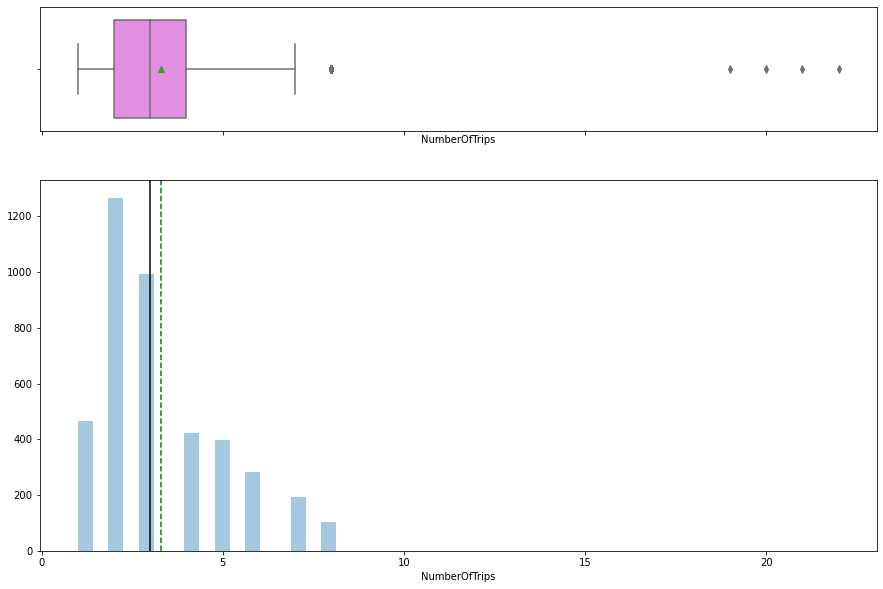

<IPython.core.display.Javascript object>

In [32]:
# Histogram showing NumberOfTrips
histogram_boxplot(data["NumberOfTrips"])

#### Observations
There are some major outliers in this variable that need some treatment later.  There is a right skew, with the mean being greater than the median.

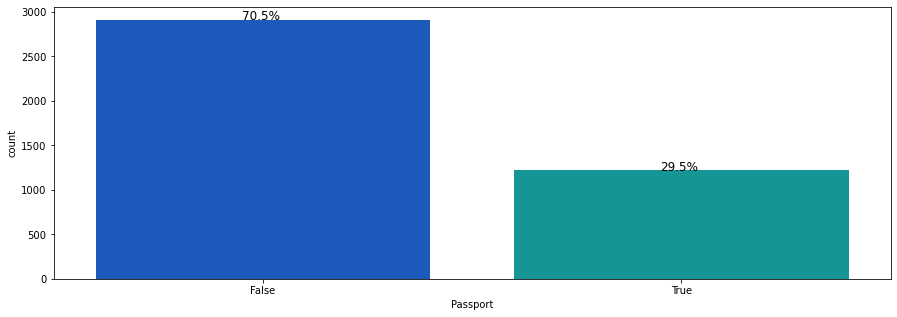

<IPython.core.display.Javascript object>

In [33]:
# Countplot of Passport
plt.figure(figsize=(15, 5))
ax = sns.countplot(data["Passport"], palette="winter")
percent(ax, data["Passport"])

#### Observations
70% do not have a passport.

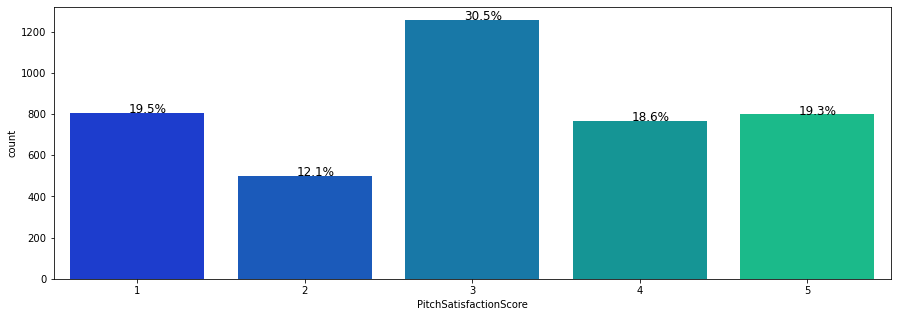

<IPython.core.display.Javascript object>

In [34]:
# Countplot of PitchSatisfactionScore
plt.figure(figsize=(15, 5))
ax = sns.countplot(data["PitchSatisfactionScore"], palette="winter")
percent(ax, data["PitchSatisfactionScore"])

#### Observations
These variables are quite even.

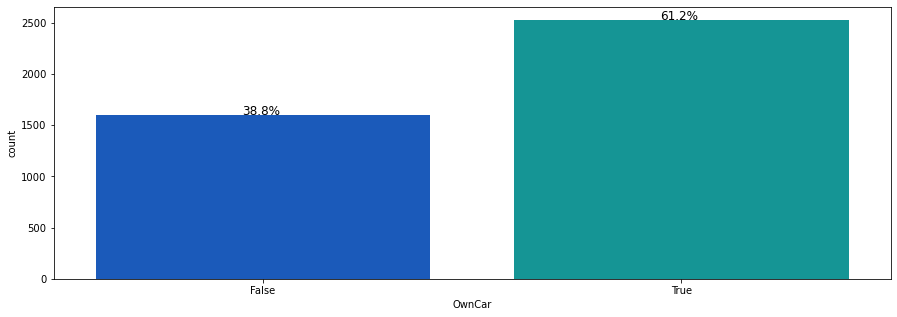

<IPython.core.display.Javascript object>

In [35]:
# Countplot of OwnCar
plt.figure(figsize=(15, 5))
ax = sns.countplot(data["OwnCar"], palette="winter")
percent(ax, data["OwnCar"])

#### Observations
60% own a car.

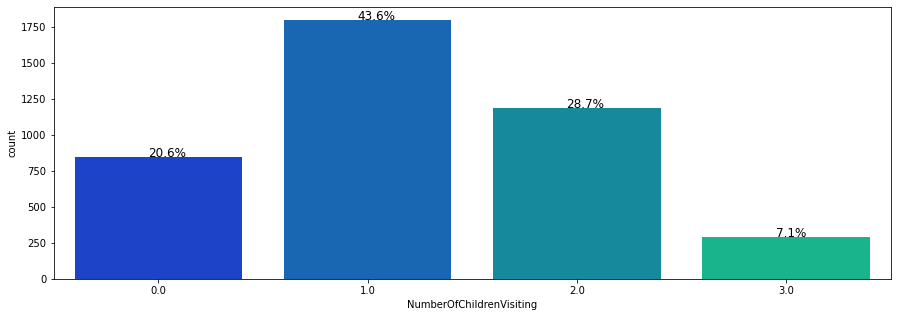

<IPython.core.display.Javascript object>

In [36]:
# Countplot of NumberOfChildrenVisiting
plt.figure(figsize=(15, 5))
ax = sns.countplot(data["NumberOfChildrenVisiting"], palette="winter")
percent(ax, data["NumberOfChildrenVisiting"])

#### Observations
Most of the dataset is two or less children.

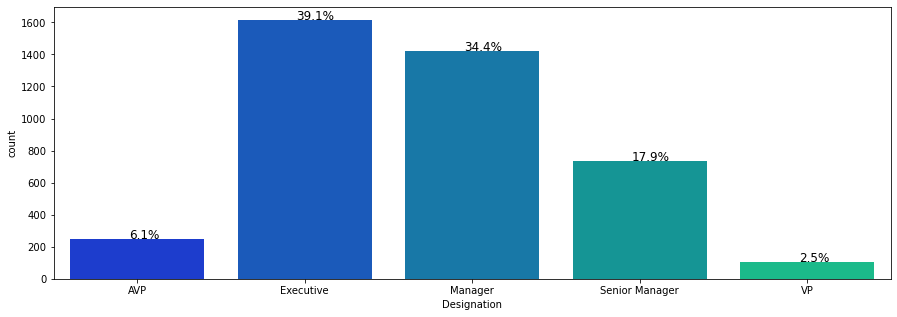

<IPython.core.display.Javascript object>

In [37]:
# Countplot of Designation
plt.figure(figsize=(15, 5))
ax = sns.countplot(data["Designation"], palette="winter")
percent(ax, data["Designation"])

#### Observations
Executive and managers are the most common designation in the dataset.  VP's and AVP's are quite rare.

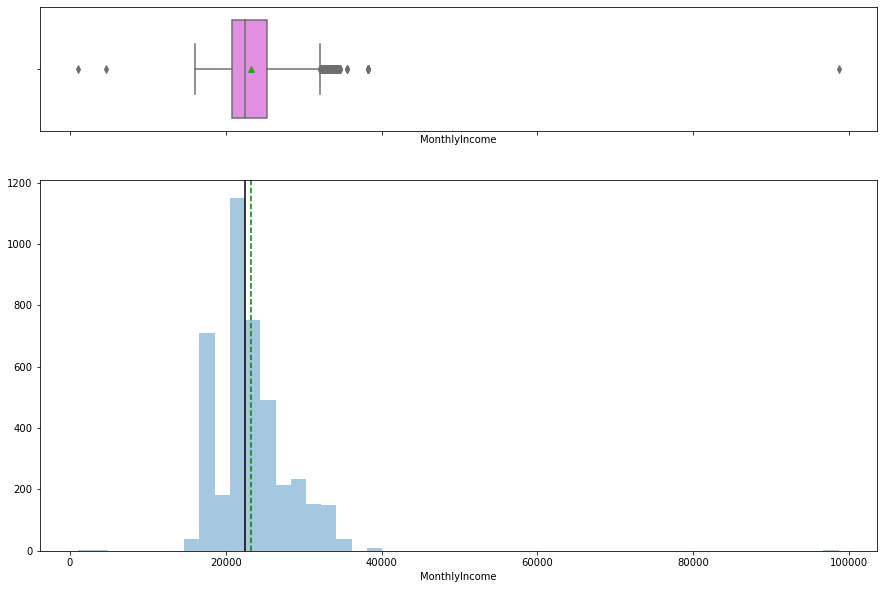

<IPython.core.display.Javascript object>

In [38]:
# Histogram showing MonthlyIncome
histogram_boxplot(data["MonthlyIncome"])

#### Observations
There are some outliers in Income.  I will look at this further in outlier treatment.  There is a slight right skew in this variable.

### Multivariate Analysis

<AxesSubplot:xlabel='Occupation', ylabel='count'>

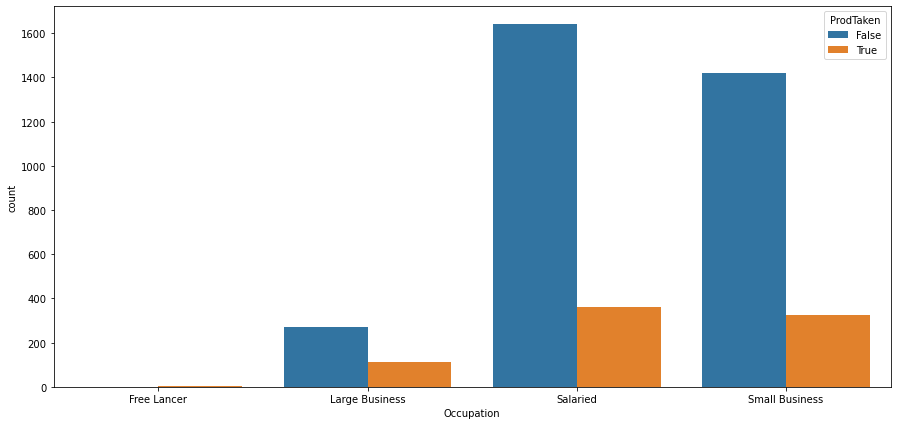

<IPython.core.display.Javascript object>

In [39]:
# Countplot of Occupation and ProdTaken
plt.figure(figsize=(15, 7))
sns.countplot(x="Occupation", hue="ProdTaken", data=data)

#### Observations
I see that free lancers are avoided. However, it's hard to make an accurate analysis on that occupation unless I get a greater sample size.

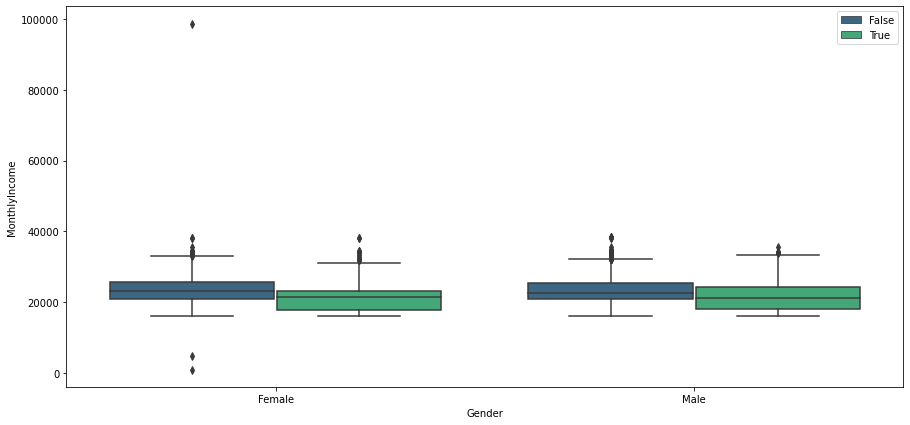

<IPython.core.display.Javascript object>

In [40]:
# Boxplot of Gender, MonthlyIncome, and ProductPitched
plt.figure(figsize=(15, 7))
sns.boxplot(
    data["Gender"], data["MonthlyIncome"], hue=data["ProdTaken"], palette="viridis"
)
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

#### Observations
It appears that Gender is not really an influential variable for the product conversion. They are quite even.

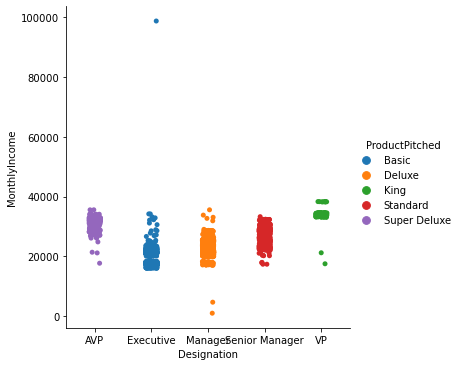

<IPython.core.display.Javascript object>

In [41]:
# Boxplot of Designation, Income, and ProductPitched
sns.catplot(
    x="Designation", y="MonthlyIncome", hue="ProductPitched", data=data, kind="strip"
)

#### Observations
I see that King is purchased by the highest income individuals.  I also see that the product pitched is entirely based on designation.  This is a huge insight on our data.  I can determine so much from this visual.

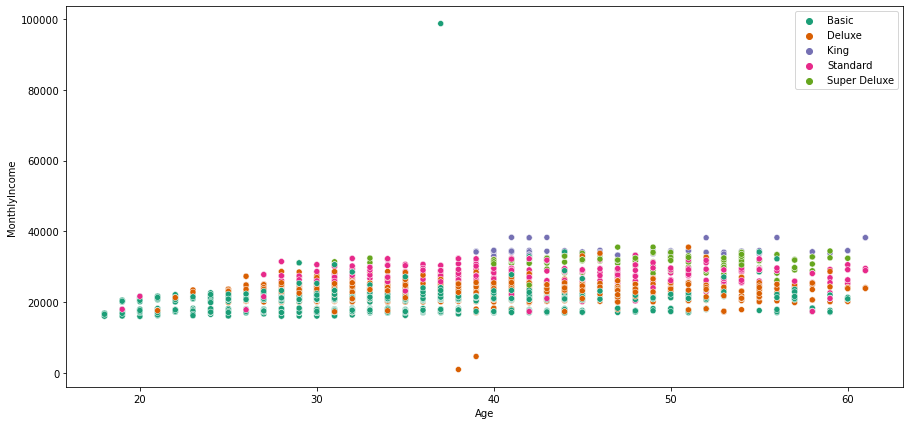

<IPython.core.display.Javascript object>

In [42]:
# Scatterplot of Age, Income, and ProductPitched
plt.figure(figsize=(15, 7))
sns.scatterplot(
    data["Age"],
    data["MonthlyIncome"],
    hue=data["ProductPitched"],
    ci=0.0,
    palette="Dark2",
)
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

#### Observations
Maried and single data points are more likely to get the basic and deluxe packages. Unmarried tend to not really get any of the King or Super Deluxe Packages.

<AxesSubplot:xlabel='CityTier', ylabel='count'>

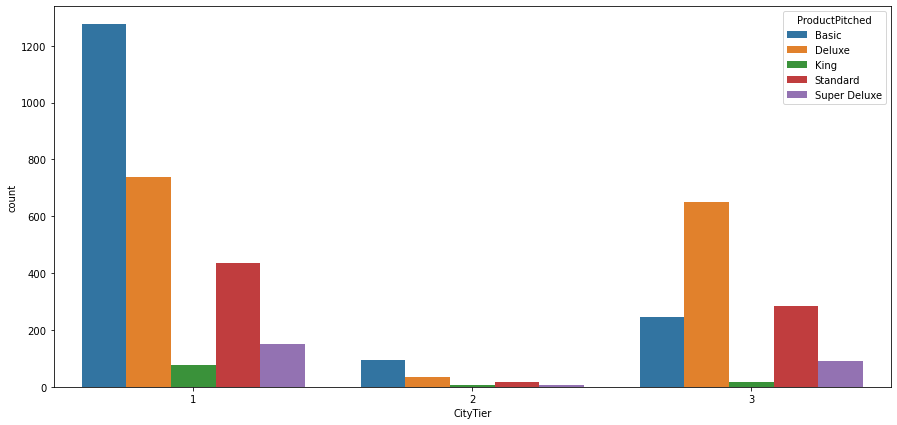

<IPython.core.display.Javascript object>

In [43]:
# Countplot of CityTier and ProductPitched
plt.figure(figsize=(15, 7))
sns.countplot(x="CityTier", hue="ProductPitched", data=data)

#### Observations
I see that in the city tier 1, they are highly likely to purchase the basic package.  None of the 3 purchase the king package, and it appears that city tier 2, in general, does not get any package.

<AxesSubplot:xlabel='NumberOfFollowups', ylabel='count'>

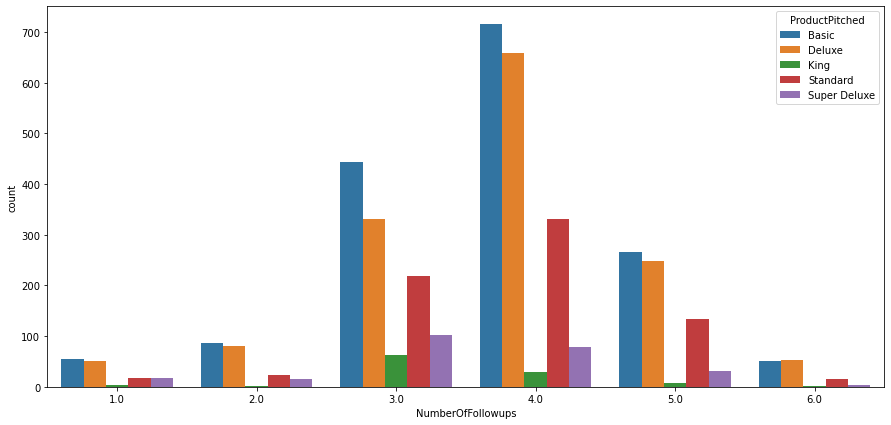

<IPython.core.display.Javascript object>

In [44]:
# Countplot of NumberOfFollowups and ProductPitched
plt.figure(figsize=(15, 7))
sns.countplot(x="NumberOfFollowups", hue="ProductPitched", data=data)

#### Observations
I see here that the number of followups are rather high fro those who got the basic and deluxe.  They needed 3-4 to make the package purchase

<AxesSubplot:xlabel='ProdTaken', ylabel='count'>

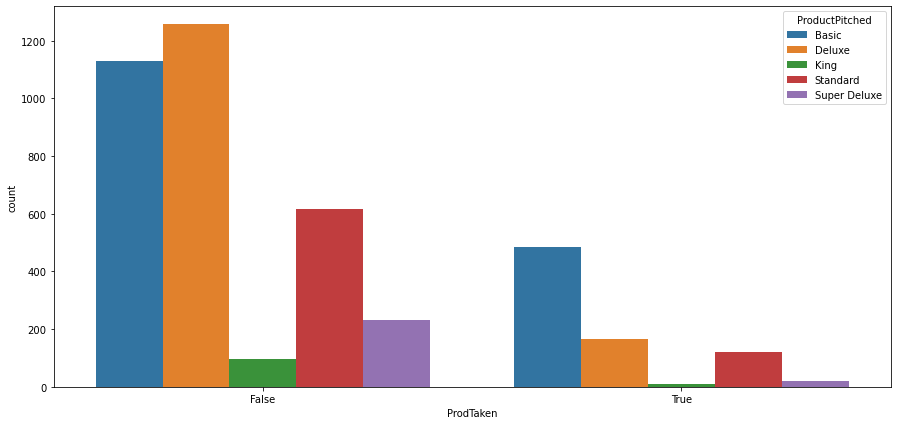

<IPython.core.display.Javascript object>

In [45]:
# Countplot of ProdTaken and ProductPitched
plt.figure(figsize=(15, 7))
sns.countplot(x="ProdTaken", hue="ProductPitched", data=data)

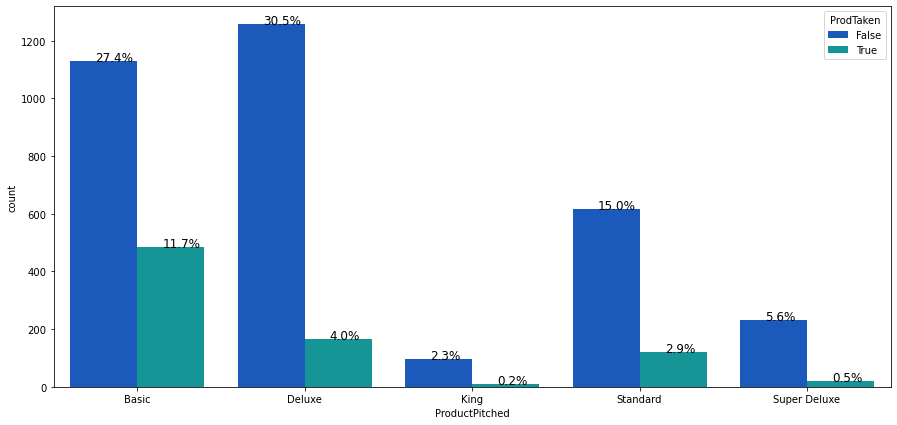

<IPython.core.display.Javascript object>

In [46]:
# Using a countplot to show us the proportions in percentage form of conversion for each group
plt.figure(figsize=(15, 7))
ax = sns.countplot(data["ProductPitched"], hue=data["ProdTaken"], palette="winter")
percent(ax, data["ProductPitched"])

#### Observations
Here I see the conversion rate amongst the packages.  See the end of the notebook for detailed explanation

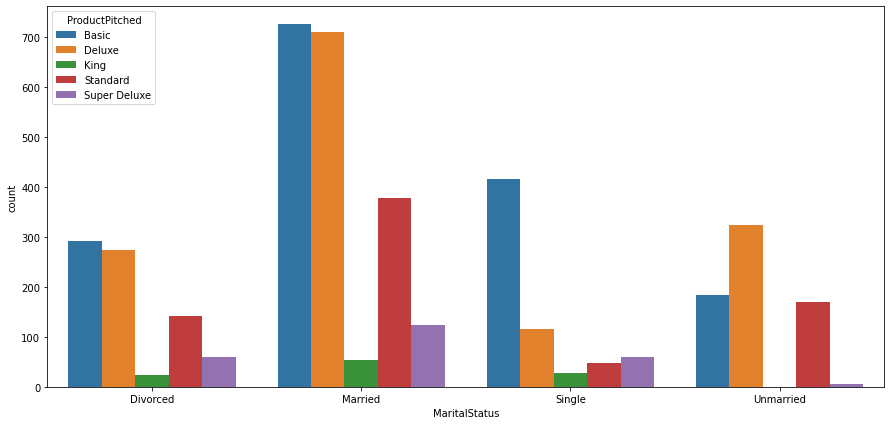

<IPython.core.display.Javascript object>

In [47]:
# Using a countplot to show us the Marital Status in relation to ProductPitched
plt.figure(figsize=(15, 7))
ax = sns.countplot(data["MaritalStatus"], hue=data["ProductPitched"])

#### Observations
Unmarried do not purchase the King package OR the Super Deluxe package

<Figure size 2160x1440 with 0 Axes>

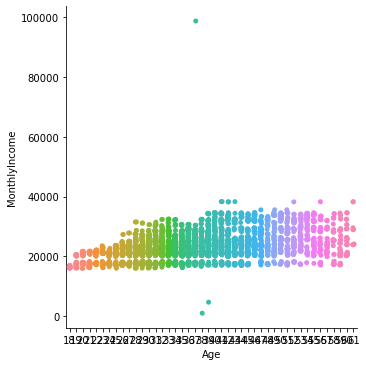

<IPython.core.display.Javascript object>

In [48]:
# Boxplot of Age and Income
plt.figure(figsize=(30, 20))
sns.catplot(
    x="Age",
    y="MonthlyIncome",
    data=data,
    kind="strip",
)

#### Observations
I see here that as age goes up, so does income

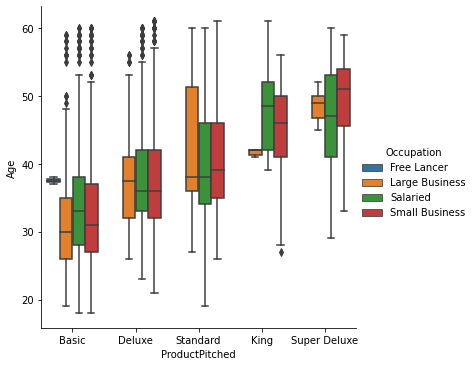

<IPython.core.display.Javascript object>

In [49]:
# Boxplot of ProductPitched, Age, and Occupation
sns.catplot(
    x="ProductPitched",
    y="Age",
    hue="Occupation",
    data=data,
    kind="box",
    order=["Basic", "Deluxe", "Standard", "King", "Super Deluxe"],
)

#### Observations
I see a positive correlation with age and the type of package purchased. As the older you get, you will purchase a "nicer" package. Income most likely plays into this.

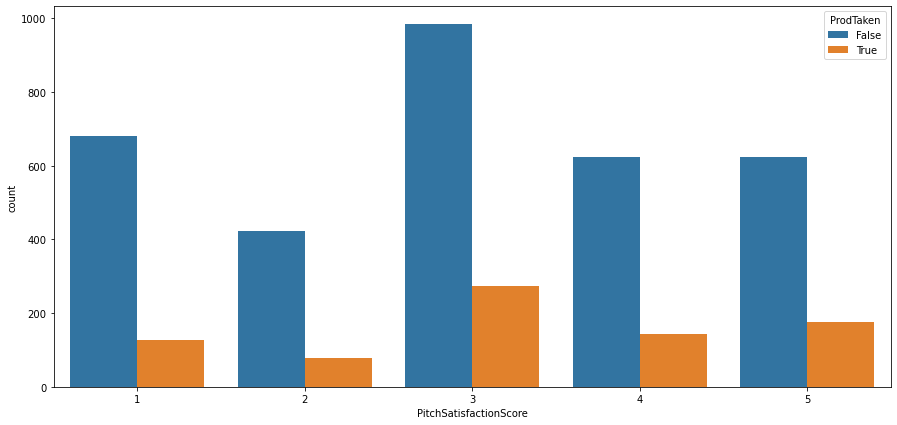

<IPython.core.display.Javascript object>

In [50]:
# Using a countplot to show us the Marital Status in relation to ProductPitched
plt.figure(figsize=(15, 7))
ax = sns.countplot(data["PitchSatisfactionScore"], hue=data["ProdTaken"])

#### Observation
This is odd.  One could infer that someone who purchases would rank the pitch higher.  This variable is misleading. Why would those who rank it 1 still purchase the product? I would imagine that the higher the rank, the higher amount of True for ProdTaken. I wonder if there is an issue with collection. I will drop this variable because this seems like a collection error.

In [51]:
# Let's drop the PitchSatisfactionScore column
data.drop(["PitchSatisfactionScore"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

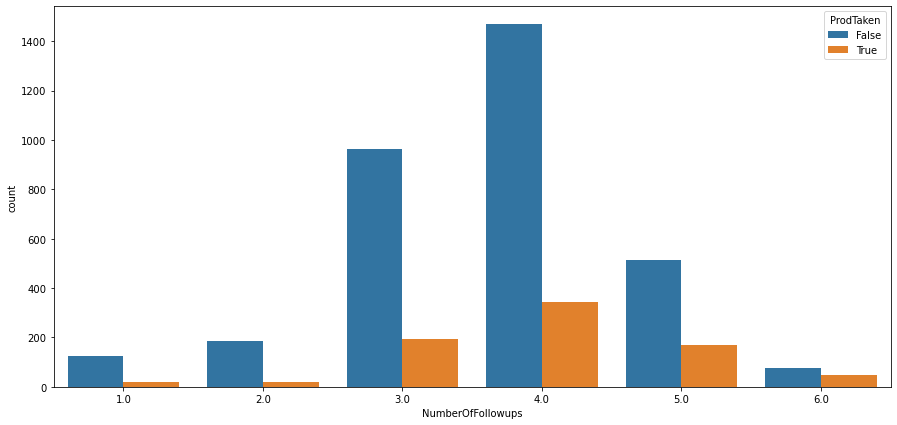

<IPython.core.display.Javascript object>

In [52]:
# Using a countplot to show us the Marital Status in relation to ProductPitched
plt.figure(figsize=(15, 7))
ax = sns.countplot(data["NumberOfFollowups"], hue=data["ProdTaken"])

#### Observation
I do not really see an tremendous increase in success as followups increase past 3 and 4.  Unsure if the company would like to follow up more than 5 times.

## Outlier Treatment

I want to treat outliers for some variables because they will skew the model I am building. I am going to use z transformation to catch and drop outliers for a few of the variables.

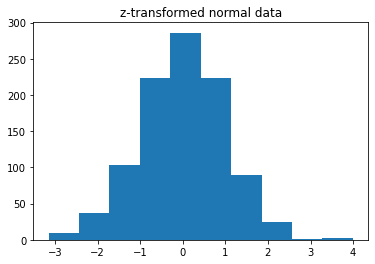

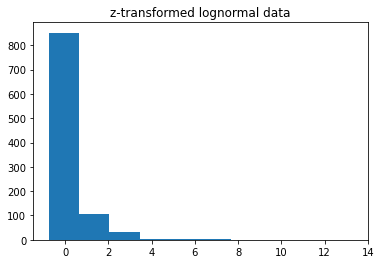

<IPython.core.display.Javascript object>

In [53]:
# Using Z-Transformation to flag outliers in our variables
def z_transform(x):
    return (x - np.mean(x)) / np.std(x)


np.random.seed(1)
x1 = np.random.normal(size=1000)
x2 = np.random.lognormal(size=1000)


plt.hist(z_transform(x1))
plt.title("z-transformed normal data")
plt.show()


plt.hist(z_transform(x2))
plt.title("z-transformed lognormal data")
plt.show()

In [54]:
# Let's flag outliers for each of the variables
def frac_outside_1pt5_IQR(x):
    length = 1.5 * np.diff(np.quantile(x, [0.25, 0.75]))
    return np.mean(np.abs(x - np.median(x)) > length)


print(frac_outside_1pt5_IQR(x1))
print(frac_outside_1pt5_IQR(x2))

0.05
0.132


<IPython.core.display.Javascript object>

In [55]:
# Outliers of DurationOfPitch
quartiles = np.quantile(
    data["DurationOfPitch"][data["DurationOfPitch"].notnull()], [0.25, 0.75]
)
power_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f"Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {power_4iqr}")
outlier_powers1 = data.loc[
    np.abs(data["DurationOfPitch"] - data["DurationOfPitch"].median()) > power_4iqr,
    "DurationOfPitch",
]
outlier_powers1

Q1 = 9.0, Q3 = 20.0, 4*IQR = 44.0


3878    127.0
Name: DurationOfPitch, dtype: float64

<IPython.core.display.Javascript object>

In [56]:
# Dropping outliers of DurationOfPitch
data.drop(outlier_powers1.index, axis=0, inplace=True)

<IPython.core.display.Javascript object>

In [57]:
# Outliers of NumberOfTrips
quartiles = np.quantile(
    data["NumberOfTrips"][data["NumberOfTrips"].notnull()], [0.25, 0.75]
)
power_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f"Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {power_4iqr}")
outlier_powers2 = data.loc[
    np.abs(data["NumberOfTrips"] - data["NumberOfTrips"].median()) > power_4iqr,
    "NumberOfTrips",
]
outlier_powers2

Q1 = 2.0, Q3 = 4.0, 4*IQR = 8.0


385     19.0
816     21.0
2829    20.0
3260    22.0
Name: NumberOfTrips, dtype: float64

<IPython.core.display.Javascript object>

In [58]:
# Dropping outliers of NumberOfTrips
data.drop(outlier_powers2.index, axis=0, inplace=True)

<IPython.core.display.Javascript object>

In [59]:
# Outliers of MonthlyIncome
quartiles = np.quantile(
    data["MonthlyIncome"][data["MonthlyIncome"].notnull()], [0.25, 0.75]
)
power_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f"Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {power_4iqr}")
outlier_powers3 = data.loc[
    np.abs(data["MonthlyIncome"] - data["MonthlyIncome"].median()) > power_4iqr,
    "MonthlyIncome",
]
outlier_powers3

Q1 = 20751.0, Q3 = 25301.0, 4*IQR = 18200.0


142      1000.0
2482    98678.0
Name: MonthlyIncome, dtype: float64

<IPython.core.display.Javascript object>

In [60]:
# Dropping outliers of MonthlyIncome
data.drop(outlier_powers3.index, axis=0, inplace=True)

<IPython.core.display.Javascript object>

In [61]:
data.shape

(4121, 18)

<IPython.core.display.Javascript object>

#### Observations
I have now removed outlier from the variables I saw had them when doing EDA.

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4121 entries, 0 to 4887
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4121 non-null   bool    
 1   Age                       4121 non-null   int64   
 2   TypeofContact             4121 non-null   category
 3   CityTier                  4121 non-null   category
 4   DurationOfPitch           4121 non-null   float64 
 5   Occupation                4121 non-null   category
 6   Gender                    4121 non-null   category
 7   NumberOfPersonVisiting    4121 non-null   int64   
 8   NumberOfFollowups         4121 non-null   float64 
 9   ProductPitched            4121 non-null   category
 10  PreferredPropertyStar     4121 non-null   category
 11  MaritalStatus             4121 non-null   category
 12  NumberOfTrips             4121 non-null   float64 
 13  Passport                  4121 non-null   bool  

<IPython.core.display.Javascript object>

## Model Building

In [63]:
# First, I always drop our target variable. In this instance, it is ProdTaken
X = data.drop(["ProdTaken"], axis=1)
Y = data["ProdTaken"]

# Building our dummies for categorical varaibles
X = pd.get_dummies(
    X,
    columns=[
        "TypeofContact",
        "CityTier",
        "Occupation",
        "Gender",
        "ProductPitched",
        "PreferredPropertyStar",
        "MaritalStatus",
        "Designation",
    ],
    drop_first=True,
)

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

<IPython.core.display.Javascript object>

In [64]:
# Defining function to get metrics Accuracy, Recall and Precision
def get_metrics_score(model, flag=True):
    score_list = []

    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)

    train_recall = metrics.recall_score(y_train, pred_train)
    test_recall = metrics.recall_score(y_test, pred_test)

    train_precision = metrics.precision_score(y_train, pred_train)
    test_precision = metrics.precision_score(y_test, pred_test)

    score_list.extend(
        (
            train_acc,
            test_acc,
            train_recall,
            test_recall,
            train_precision,
            test_precision,
        )
    )

    if flag == True:
        print("Accuracy For Training Set: ", model.score(X_train, y_train))
        print("Accuracy For Test Set: ", model.score(X_test, y_test))
        print("Recall For Training Set: ", metrics.recall_score(y_train, pred_train))
        print("Recall on test set: ", metrics.recall_score(y_test, pred_test))
        print(
            "Precision For Training Set: ", metrics.precision_score(y_train, pred_train)
        )
        print("Precision For Test Set: ", metrics.precision_score(y_test, pred_test))

    return score_list

<IPython.core.display.Javascript object>

In [65]:
# Confusion Matrix function
def make_confusion_matrix(model, y_actual, labels=[1, 0]):
    y_predict = model.predict(X_test)
    cm = metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(
        cm,
        index=[i for i in ["Actual - No", "Actual - Yes"]],
        columns=[i for i in ["Predicted - No", "Predicted - Yes"]],
    )
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

In [66]:
# Listing X columns, or features
feature_names = list(X.columns)
print(feature_names)

['Age', 'DurationOfPitch', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'NumberOfTrips', 'Passport', 'OwnCar', 'NumberOfChildrenVisiting', 'MonthlyIncome', 'TypeofContact_Self Enquiry', 'CityTier_2', 'CityTier_3', 'Occupation_Large Business', 'Occupation_Salaried', 'Occupation_Small Business', 'Gender_Male', 'ProductPitched_Deluxe', 'ProductPitched_King', 'ProductPitched_Standard', 'ProductPitched_Super Deluxe', 'PreferredPropertyStar_4.0', 'PreferredPropertyStar_5.0', 'MaritalStatus_Married', 'MaritalStatus_Single', 'MaritalStatus_Unmarried', 'Designation_Executive', 'Designation_Manager', 'Designation_Senior Manager', 'Designation_VP']


<IPython.core.display.Javascript object>

In [67]:
# Fitting our decision tree
dTree = DecisionTreeClassifier(criterion="gini", random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

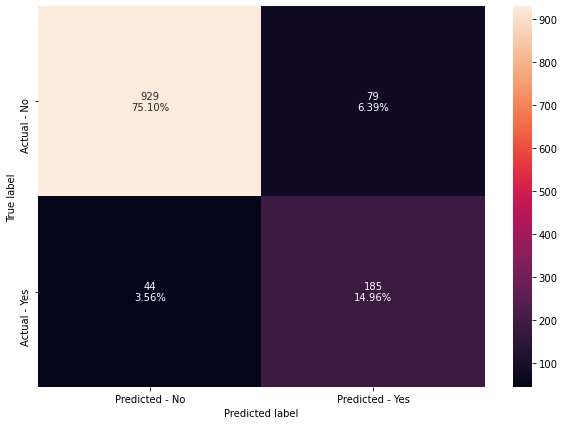

<IPython.core.display.Javascript object>

In [68]:
# Decision tree confusion matrix
make_confusion_matrix(dTree, y_test)

In [69]:
# Calculating recall score
def get_recall_score(model):
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set : ", metrics.recall_score(y_train, pred_train))
    print("Recall on test set : ", metrics.recall_score(y_test, pred_test))

<IPython.core.display.Javascript object>

In [70]:
# Recall score for our decision tree
get_recall_score(dTree)

Recall on training set :  1.0
Recall on test set :  0.8078602620087336


<IPython.core.display.Javascript object>

#### Observations
I see a recall of 81% on our test set, not horrible, but it could hopefully improve!

In [71]:
# Accuracy for our decision tree
print("Accuracy on training set : ", dTree.score(X_train, y_train))
print("Accuracy on test set : ", dTree.score(X_test, y_test))

Accuracy on training set :  1.0
Accuracy on test set :  0.9005658852061439


<IPython.core.display.Javascript object>

#### Observations
This is actually quite good for our test set. 90%!

In [72]:
# Plotting our decision tree
plt.figure(figsize=(20, 30))
tree.plot_tree(
    dTree,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

KeyboardInterrupt: 

<IPython.core.display.Javascript object>

In [ ]:
# Text of decision tree
print(tree.export_text(dTree, feature_names=feature_names, show_weights=True))

In [ ]:
# Variables of importance
print(
    pd.DataFrame(
        dTree.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

In [ ]:
importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Observations
I see that Age is by far the most important variable.  Then followed by DurationOfPitch and Income

## Bagging And Random Forest

I are going to do both and compare

### Bagging 

In [ ]:
# Bagging classifier base estimator
bagging_estimator = BaggingClassifier(random_state=1)
bagging_estimator.fit(X_train, y_train)

In [ ]:
# Showing Accuracy, Recall and Precision from our bagging estimator variable
bagging_estimator_score = get_metrics_score(bagging_estimator)

In [ ]:
# Confusion matrix of bagging estimator
make_confusion_matrix(bagging_estimator, y_test)

#### Observations
I have great accuracy in this model.  Decision trees overfit, so this is normal.  On our test, it is 91%.  All things considered, this isn't a bad model

### Random Forest 

In [ ]:
# Train the random forest classifier
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train, y_train)

In [ ]:
# Random Forest statistics: Accuracy, Recall, and Precision
rf_estimator_score = get_metrics_score(rf_estimator)

In [ ]:
# Random Forest confusion matrix
make_confusion_matrix(rf_estimator, y_test)

#### Observations
In Random forest, it is not too much different than bagging.  I see less Type I errors, and about the same Type II variables.  It overfits the data a ton.  Recall is slightly lower in test test set, however. Overall, these are pretty even.

### Hyperparameters

#### Bagging

In [ ]:
# Tuning our BaggingClassifier
bagging_estimator_tuned = BaggingClassifier(random_state=1)

parameters = {
    "max_samples": [0.7, 0.8, 0.9, 1],
    "max_features": [0.7, 0.8, 0.9, 1],
    "n_estimators": [10, 20, 30, 40, 50],
}

acc_scorer = metrics.make_scorer(metrics.recall_score)

# GridSearch
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

bagging_estimator_tuned = grid_obj.best_estimator_

bagging_estimator_tuned.fit(X_train, y_train)

In [ ]:
# Tuned Bagging metrics
bagging_estimator_tuned_score = get_metrics_score(bagging_estimator_tuned)

In [ ]:
# Confusion matrix of tuned model
make_confusion_matrix(bagging_estimator_tuned, y_test)

#### Observations
After tuning, I see some improvements.  First of all, I got the best estimator

Max Features = 0.9

Max Smaples = 0.9

N Estimators = 50

Our recall on test set is similar to random forest, but I see that there is still overfitting

In [ ]:
bagging_lr = BaggingClassifier(
    base_estimator=LogisticRegression(solver="liblinear", random_state=1),
    random_state=1,
)
bagging_lr.fit(X_train, y_train)

In [ ]:
# Using our new function to get our metrics
bagging_lr_score = get_metrics_score(bagging_lr)

#### Observations

I see that this improved accuracy, less overfitting. This is good!. Our test set has improved.

#### Random Forest Tuning

In [ ]:
# Random Forest Tuning
rf_estimator_tuned = RandomForestClassifier(random_state=1)

parameters = {
    "n_estimators": [150, 200, 250],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.1),
}

acc_scorer = metrics.make_scorer(metrics.recall_score)

# GridSearch
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

rf_estimator_tuned = grid_obj.best_estimator_

rf_estimator_tuned.fit(X_train, y_train)

In [ ]:
# Using our function to get metrics for tuned random forest
rf_estimator_tuned_score = get_metrics_score(rf_estimator_tuned)

In [ ]:
# Confusion matrix of RandomForest tuned
make_confusion_matrix(rf_estimator_tuned, y_test)

In [ ]:
# Weighting Random Forest
rf_estimator_weighted = RandomForestClassifier(random_state=1)

parameters = {
    "class_weight": [{0: 0.3, 1: 0.7}],
    "n_estimators": [100, 150, 200, 250],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.1),
}

acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_weighted, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

rf_estimator_weighted = grid_obj.best_estimator_

rf_estimator_weighted.fit(X_train, y_train)

In [ ]:
# Showing Accuracy, Recall and Precision from our Random Forest weighted model
rf_estimator_weighted_score = get_metrics_score(rf_estimator_weighted)

In [ ]:
# Confusion Matrix of weight random forest
make_confusion_matrix(rf_estimator_weighted, y_test)

In [ ]:
importances = rf_estimator_weighted.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Observations
I see the list of important features.  Passport, then Age, then duration of pitch lead to the success of purchase.  These are different variables than our previous Feature Importances I have calculated.

## Boosting

### Adaboost

In [ ]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train, y_train)

In [ ]:
# Using our function to get metrics for the set
abc_score = get_metrics_score(abc)

In [ ]:
make_confusion_matrix(abc, y_test)

### Gradient Boost

In [ ]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train, y_train)

In [ ]:
# Using our function to get metrics for the set
gbc_score = get_metrics_score(gbc)

In [ ]:
make_confusion_matrix(gbc, y_test)

In [ ]:
# Listing the feature importances in orderr for this model
importances = gbc.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### XGBoost 

In [ ]:
xgb = XGBClassifier(random_state=1, eval_metric="logloss")
xgb.fit(X_train, y_train)

In [ ]:
# Using our function to get metrics for the set
xgb_score = get_metrics_score(xgb)

In [ ]:
make_confusion_matrix(xgb, y_test)

In [ ]:
# Listing the feature importances in orderr for this model
importances = xgb.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Tuning Our Boosted Models
#### I am going to tune these before making a recommendation

#### Adaboost

In [ ]:
# Tuned AdaBoost
abc_tuned = AdaBoostClassifier(random_state=1)


parameters = {
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": np.arange(0.1, 2, 0.1),
}


acc_scorer = metrics.make_scorer(metrics.recall_score)


grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)


abc_tuned = grid_obj.best_estimator_

abc_tuned.fit(X_train, y_train)

In [ ]:
# Using our function to get metrics for the set
abc_tuned_score = get_metrics_score(abc_tuned)

In [ ]:
# AdaBoost Confusion Matrix
make_confusion_matrix(abc_tuned, y_test)

#### Observations
Tune Adaboost still has some Type I and Type II errors.

In [ ]:
# Listing the feature importances in order for this model
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Observations
I see that Income, Age, and DurationOfPitch are most important features for this tuned model.

#### Gradient

In [ ]:
gbc_init = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)
gbc_init.fit(X_train, y_train)

In [ ]:
# Using our function to get metrics for the set
gbc_init_score = get_metrics_score(gbc_init)

#### Observations
This model does not have very good metrics. Recall is quite bad on this model.

In [ ]:
# Gradient Boosting
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)


parameters = {
    "n_estimators": [100, 150, 200, 250],
    "subsample": [0.8, 0.9, 1],
    "max_features": [0.7, 0.8, 0.9, 1],
}


acc_scorer = metrics.make_scorer(metrics.recall_score)


grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)


gbc_tuned = grid_obj.best_estimator_


gbc_tuned.fit(X_train, y_train)

In [ ]:
# Using our function to get metrics for the set
gbc_tuned_score = get_metrics_score(gbc_tuned)

In [ ]:
# Gradient Boost Confusion Matrix
make_confusion_matrix(gbc_tuned, y_test)

In [ ]:
# Listing the feature importances in order for this model
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### XGBoost Tuned is not being completed due to signficant run time.

#### Tuning our Decision Tree

In [ ]:
# Decision Tree
dtree_tuned = DecisionTreeRegressor(random_state=1)

parameters = {
    "max_depth": list(np.arange(2, 20)) + [None],
    "min_samples_leaf": [1, 3, 5, 7, 10],
    "max_leaf_nodes": [2, 3, 5, 10, 15] + [None],
    "min_impurity_decrease": [0.001, 0.01, 0.1, 0.0],
}


scorer = metrics.make_scorer(metrics.r2_score)

grid_obj = GridSearchCV(dtree_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)


dtree_tuned = grid_obj.best_estimator_


dtree_tuned.fit(X_train, y_train)

In [ ]:
# Listing the feature importances in order for this model
print(
    pd.DataFrame(
        dtree_tuned.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

In [ ]:
feature_names = X_train.columns
importances = dtree_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### A Comparison of Our Models

In [ ]:
# defining list of models
models = [
    bagging_estimator,
    bagging_estimator_tuned,
    bagging_lr,
    rf_estimator,
    rf_estimator_tuned,
    rf_estimator_weighted,
    abc,
    abc_tuned,
    gbc,
    gbc_init,
    gbc_tuned,
    xgb,
]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

for model in models:
    j = get_metrics_score(model, False)
    acc_train.append(np.round(j[0], 2))
    acc_test.append(np.round(j[1], 2))
    recall_train.append(np.round(j[2], 2))
    recall_test.append(np.round(j[3], 2))
    precision_train.append(np.round(j[4], 2))
    precision_test.append(np.round(j[5], 2))

In [ ]:
comparison_frame = pd.DataFrame(
    {
        "Model": [
            "Bagging classifier with default parameters",
            "Tuned Bagging Classifier",
            "Bagging classifier with base_estimator=LR",
            "Random Forest with default parameters",
            "Tuned Random Forest Classifier",
            "Random Forest with class_weights",
            "AdaBoost with default parameters",
            "AdaBoost Tuned",
            "Gradient Boosting with default parameters",
            "Gradient Boosting with init=AdaBoost",
            "Gradient Boosting Tuned",
            "XGBoost with default parameters",
        ],
        "Train_Accuracy": acc_train,
        "Test_Accuracy": acc_test,
        "Train_Recall": recall_train,
        "Test_Recall": recall_test,
        "Train_Precision": precision_train,
        "Test_Precision": precision_test,
    }
)
comparison_frame

#### An Analysis of these Models

I am strictly looking at the Test columns.  All of them do well in regards to Accuracy.

Tuning the decision tree saw some minor improvements on the metrics.

after tuning the random forest model, I see a DECREASE in model performance across ALL metrics.

I see that Tuned Bagging classifier gives us the best Test recall and precision.  I like that boosted model the most, as those are important metrics for our problem statement.  We are looking for high detection of accurate "Trues". We also value precision because we do not want false positives.  Considering that accuracy on our test sets are quite close for all our models, it is also safe to examine recall and precision for this reason as well.

Overall, tuning our models I saw significant improvement. Adaboost tuned tremendously improved. Gradient boosting improved as well.

### Recommendation and Conclusion

Based on EDA and modeling, I can see the following regarding each package:

*Basic*:
This is, generally speaking, for someone in their 20's and 30's who does not make very much money. The executive designation is most likely to get this package.  The Executive Designation purchases this package.

*Deluxe*:
This is for someone who is mainly in their 30's who makes more than the Basic's demographic, and is willing to splurge on a nicer package.  The Manager purchases this package.

*King*:
This package markets to the highest spenders, who are generally middle aged. The VP purchases this package.

*Standard*:
There is a decent amount of Overlap between standard and deluxe.  Both cater to the same age, and income level.  However, you are going to see someone in the Senior Manager position get standard.  This leads me to think that it is slightly more expensive. 

*Super Deluxe*:
These are the AVPs.  These buyers tender to be older. Very high income, but not as high as the VP's who purchase King.



*Other Observations*:

Occupation: Free lancers are very rare. It is tough to determine based on the small sample size.

Gender: I do not see any correlation with Gender and a specific product/package.

NumberOfFollowups: Across the dataset, I see that 3 or 4 followups are best, and they should not go past 5.

MaritalStatus: Unmarried people do not purchase the King or Super Deluxe models. 


*Product Conversion Percentages*:

Basic: 43%

Deluxe: 13%

King: 9%

Standard: 20%

Super Deluxe: 9%



I like the Tuned Bagging Classifier model, that I obtained in our test set: 93% Accuracy, 72% Recall, and 90% Precision.  This would maybe be improved if time is alotted to complete a fully tuned XGBoost model, as the XGBoost model gave us the 2nd best metrics.

I recommmend that the company takes into account the aformentioned observations regarding each package, and market accordingly.  The demographic provided will save time, money, and increase conversion if marketed properly.